In [1]:
from IPython.display import Image
import toml

# Model Evaluation

This jupyter notebook gives an overview of the model evaluation functions included in the radionets framework. To create evaluation plots the executable `radionets_evaluation <...>` is used, which is added to your path when installing the radionets package.

In [2]:
config_path = "./default_eval_config.toml"
eval_conf = toml.load(config_path)
eval_conf.keys()

dict_keys(['title', 'mode', 'paths', 'general', 'inspection', 'eval'])

The config file is divided into following parts:
* mode
* paths
* general
* inspection
* eval

### mode

One available option is to enable the `quiet` mode. This is necessary when you are running the analysis on a machine with queuing systems like `slurm`. It will disable all user input prompts. Furthermore, you can choose to run the evaluations on a `gpu`.

In [3]:
eval_conf["mode"]

{'quiet': True, 'gpu': False}

### paths
In this section, you can specify used the paths. These are `data_path`, `model_path`, `model_path2` and `norm_path`. Note that `model_path2` is needed when training seperate models for amplitude and phase. The evaluated dataset is only normalised when a `norm_path` is specified.

In [4]:
eval_conf["paths"]

{'data_path': './example_data/',
 'model_path': './build/example_model/example.model',
 'model_path_2': 'none',
 'norm_path': 'none'}

### general

Here general options like the `output_format` of the plots can be specified. Also dataset characteristics like `fourier`, `amp_phase` and `source_list` have to be set. Furthermore, `arch_name` used to train the model has to be defined. When evaluating different models for amplitude and phase, the options `seperate` and `arch_name_2` can be used.

In [5]:
eval_conf["general"]

{'output_format': 'png',
 'fourier': True,
 'amp_phase': True,
 'source_list': False,
 'arch_name': 'filter_deep',
 'separate': False,
 'arch_name_2': 'none'}

### inspection

In this section, generating differen inspection plots can be enabled. With `visualize_prediction` an overview of the predictions from the neural network is given. With the option `visualize_source_reconstruction` images of the reconstructed source distributions are generated. This is especially important when the network is trained in Fourier space. The options `visualize_dynamic_range`, `visualize_blobs` and `visualize_ms_ssim` add additional information to the legend of the source distribution plots. With the `num_images` option the number of generated visualization plots can be set.

In [6]:
eval_conf["inspection"]

{'visualize_prediction': True,
 'visualize_source_reconstruction': True,
 'visualize_dynamic_range': True,
 'visualize_blobs': True,
 'visualize_ms_ssim': True,
 'num_images': 5,
 'random': False}

In the following, example plots are shown.

## Evaluation on Example Predictions and Reconstructed Sources

All evaluation plots can be created by running `radionets_evaluation <...>` using the `default_eval_config.toml`.

In [7]:
!radionets_evaluation ./default_eval_config.toml


Evaluation config:
{'data_path': './example_data/', 'model_path': './build/example_model/example.model', 'model_path_2': 'none', 'norm_path': 'none', 'quiet': True, 'gpu': False, 'format': 'png', 'fourier': True, 'amp_phase': True, 'arch_name': 'filter_deep', 'source_list': False, 'separate': False, 'arch_name_2': 'none', 'vis_pred': True, 'vis_source': True, 'vis_dr': True, 'vis_blobs': True, 'vis_ms_ssim': True, 'num_images': 5, 'random': False, 'viewing_angle': True, 'dynamic_range': True, 'ms_ssim': True} 


Load pretrained model: example


Created 5 test predictions.


Blob visualization is enabled for source plots.


Visualization of ms ssim is enabled for source plots.


Created 5 dynamic range plots.


Load pretrained model: example


Created 5 source predictions.


Start evaluation of viewing angles.


Load pretrained model: example

/home/kschmidt_local/radio_nets/radionets/radionets/evaluation/jet_angle.py:82: UserWarning: To copy construct from a tensor, it is recommended 

The evaluation plots are saved in the `evaluation` directory which is a subdirectory of the `model` directory. Predictions from the deep learning model start with `prediction_`. Reconstructed source images start with `fft_pred_`.

In [8]:
!ls ./build/example_model/evaluation

dynamic_ranges.png  fft_pred_3.png   prediction_0.png  prediction_4.png
fft_pred_0.png	    fft_pred_4.png   prediction_1.png
fft_pred_1.png	    jet_offsets.png  prediction_2.png
fft_pred_2.png	    ms_ssim.png      prediction_3.png


Example prediction for the model trained in the previous [notebook](02_model_training.ipynb).

### Visualize Prediction

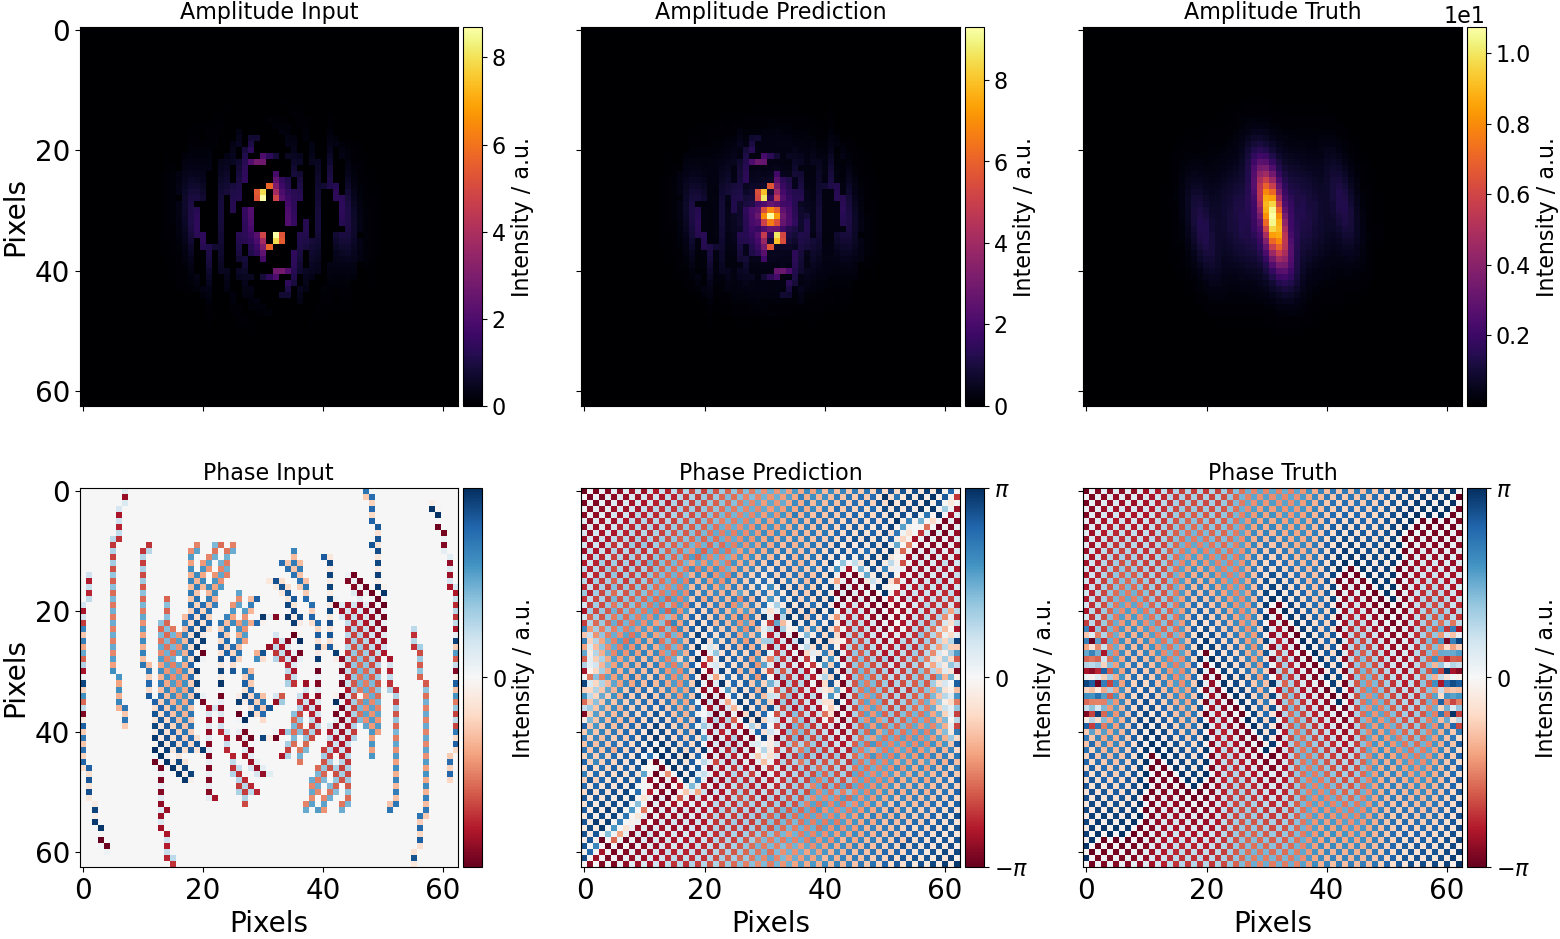

In [9]:
Image(data="./build/example_model/evaluation/prediction_0.png", width=800, height=500)

### Visualize Source Reconstruction with Dynamic Range, Blobs and MS SSIM

Example reconstructed source image for the prediction above. The jet angle is calculated using a [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) for prediction and truth. 

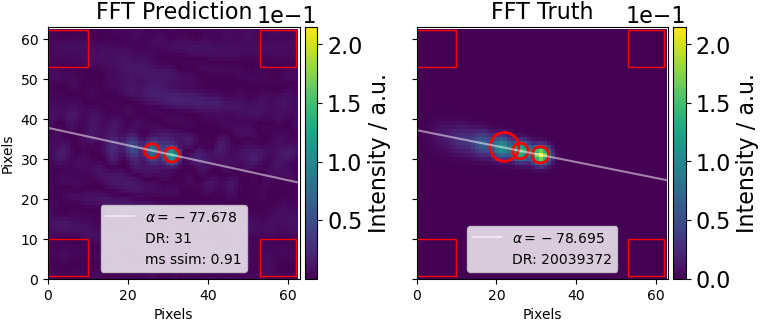

In [19]:
Image(data="./build/example_model/evaluation/fft_pred_0.png", width=800, height=400)

## Evaluation on Complete Test Dataset

In the following part, evaluation methods for the complete test dataset are presented. These options can be enabled in the `eval` section of the `config` file.

In [11]:
eval_conf["eval"]

{'evaluate_viewing_angle': True,
 'evaluate_dynamic_range': True,
 'evaluate_ms_ssim': True}

### Jet Angle

The jet angle is calculated utilizing a principle component analysis. Then the difference of determinde values for the true and the predicted source distribution is displayed in a histogram.

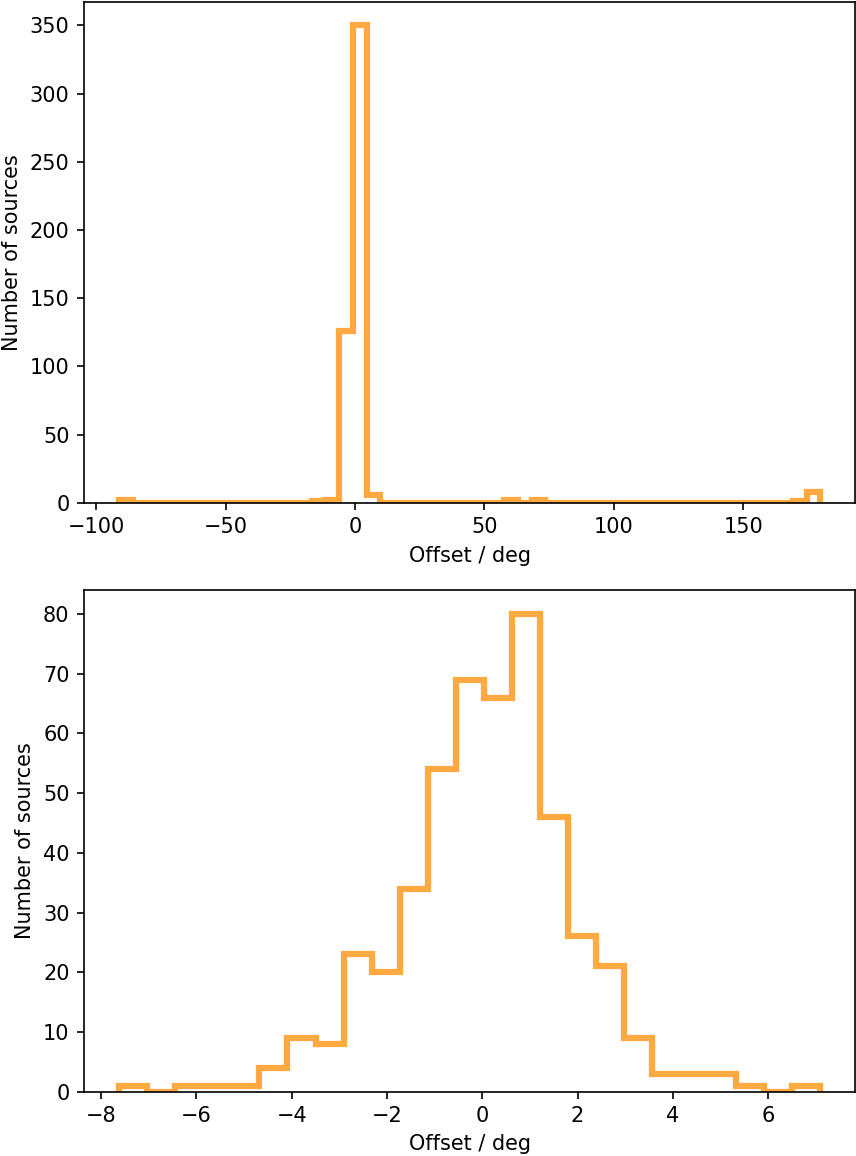

In [12]:
Image(data="./build/example_model/evaluation/jet_offsets.png", width=600, height=400)

### Dynamic Range

The dynamic range DR = max(image) / rms(image) is determined for all true and all predicted source distributions. The area for the rms calculation is adjusted depending on the jet direction. Only corners of the images beneath a flux threshold are used.

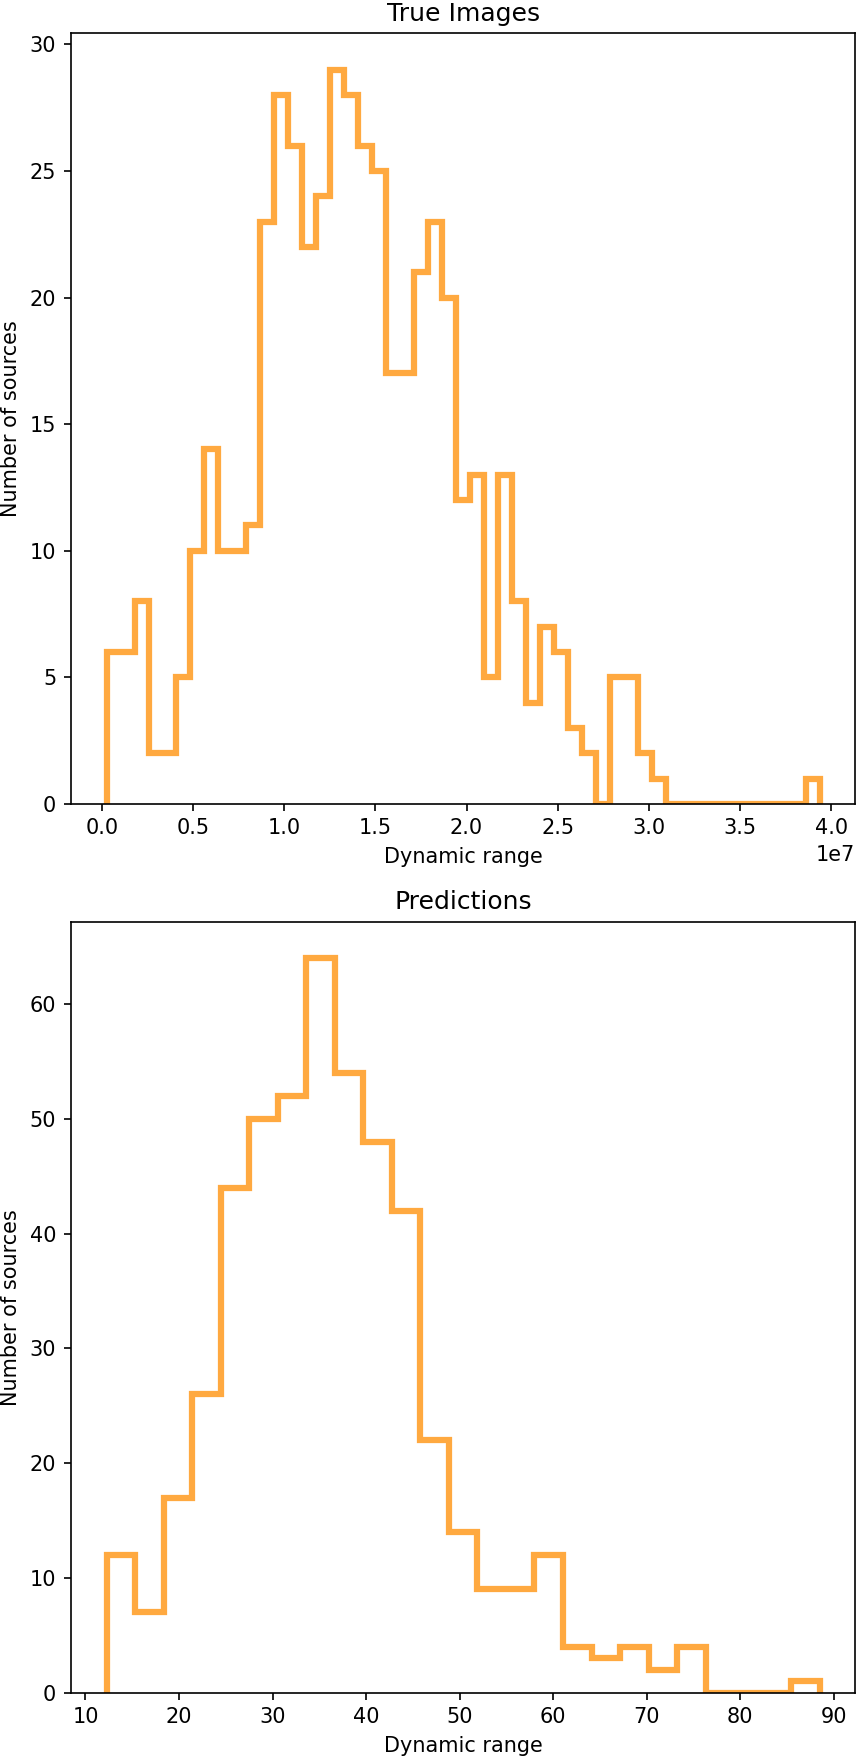

In [13]:
Image(data="./build/example_model/evaluation/dynamic_ranges.png", width=600, height=400)

### MS SSIM

the ms ssim is calculated for every image. A histogram with all values is created.

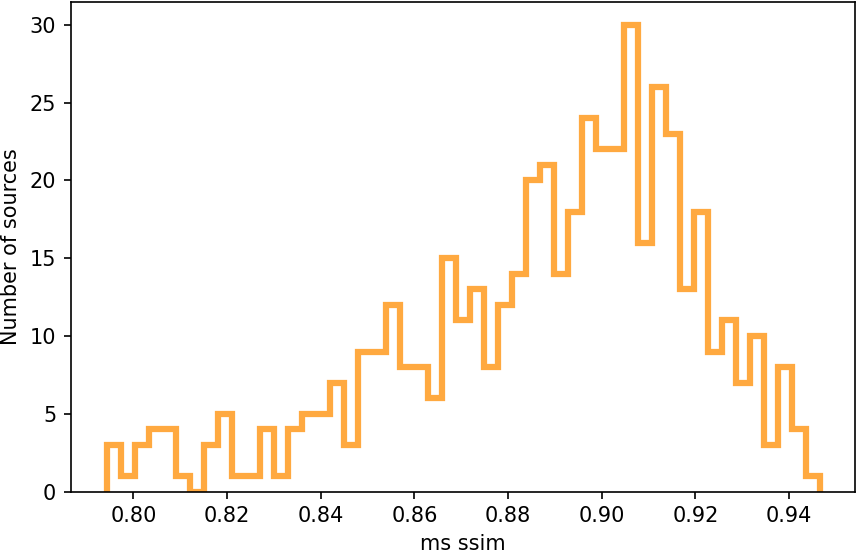

In [14]:
Image(data="./build/example_model/evaluation/ms_ssim.png", width=800, height=500)